In [2]:
import matplotlib.pyplot as plt

from read_log import TrainingRunResult, read_log

def make_label(args,label_args):
    label = []
    for argname in label_args:
        label.append(f"{argname}={args[argname]}")
    return ",".join(label)

def make_plot(results : TrainingRunResult, label_args=["lr","batch_size"]):
    num_epochs = len(results.epoch_evals)
    accuracy = []
    for epoch_res in results.epoch_evals:
        accuracy.append(epoch_res["dev_accuracy"])
    plt.plot(range(1,num_epochs+1), accuracy,label=make_label(results.args,label_args))


/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def make_plots(logfile):
    training_runs = read_log(logfile)
    done_runs = set()
    for run in training_runs:
        if str(run.args) in done_runs:
            continue
        make_plot(run)
        done_runs.add(str(run.args))
    plt.legend()
    plt.show()

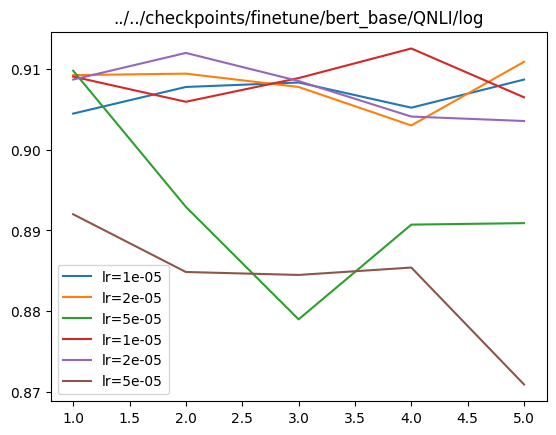

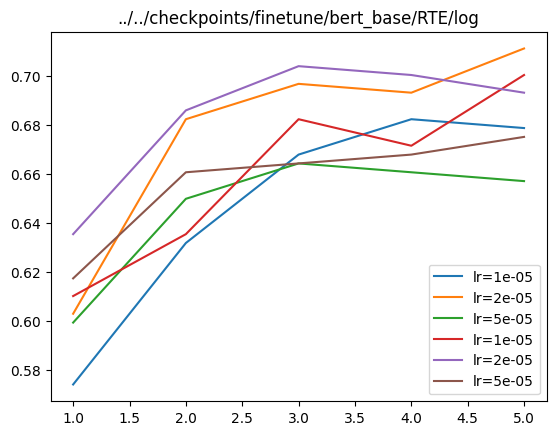

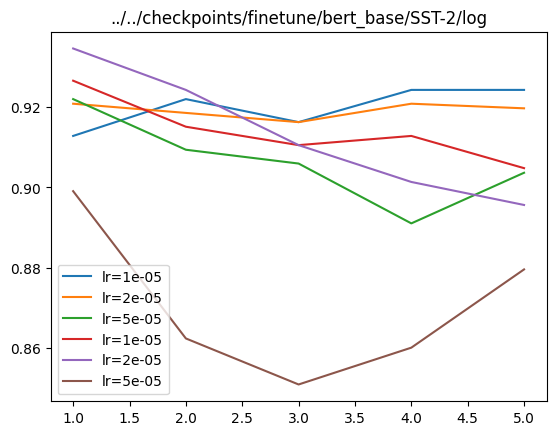

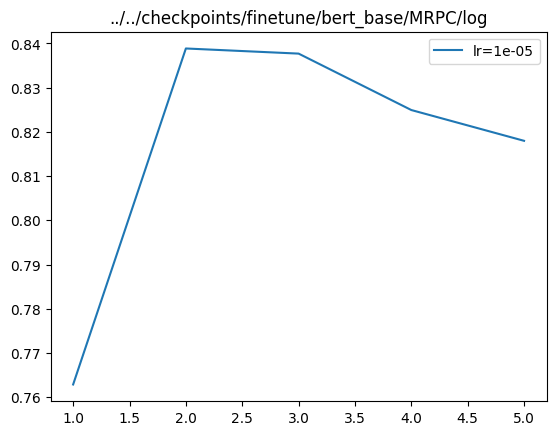

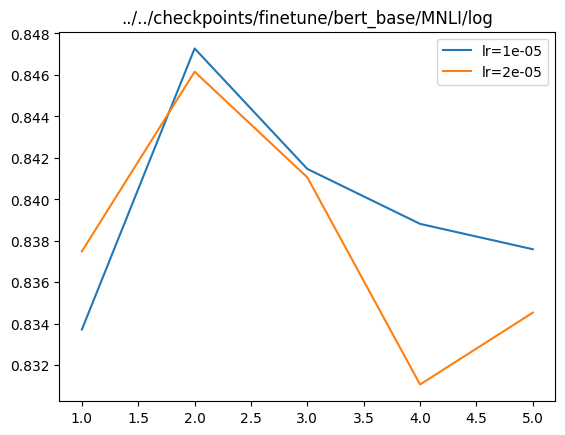

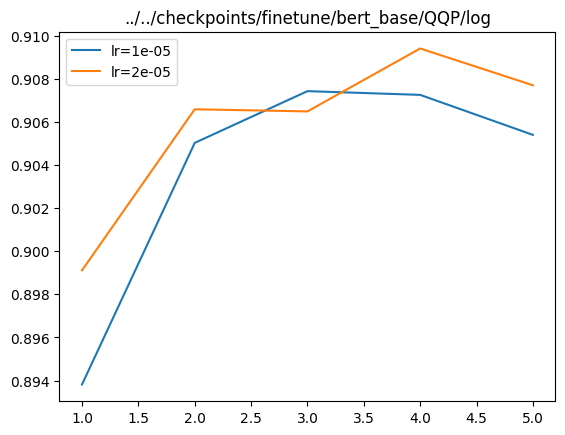

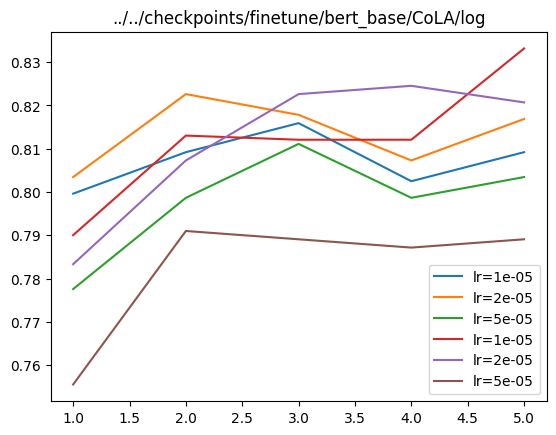

In [7]:
import glob

datasets = ["QNLI","RTE","SST-2","MRPC","MNLI","QQP","CoLA"]

for dataset in datasets:
    for logfile in glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True):
        plt.title(logfile)
        make_plots(logfile)